#**MACHINE LEARNING MTECH PROJECT: HEALTH INSURANCE COST PREDICTION **

> Members:
1. Aishwarya V - CB.EN.P2CSE2201
2. Mahakaleshwar P - CB.EN.P2CSE22007 
3. Venkatraman Ranganath - CB.EN.P2AIE22011

About the project:

Health insurance is a necessity for every individual.The insurance offered varies from company to company because the importance given to few features are different from one another.


The aim of this project is to create an understanding of the prediction of the amount required for an individual based on their health.




Dataset Information:

Dimensions of Dataset: 1338 rows , 7 features
Features:

1.   age - Age of the person
2.   sex - Sex of the person
3.   bmi - Body mass Index of the person
4.   children - Number of children for the  person
5.   smoker - Does the person smoke?
6.   region - The region, the person is based of
7.   Charges - Medical Insurance per year for the person

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [37]:
df = pd.read_csv('/content/sample_data/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [38]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [39]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [40]:
clean_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
df_copy = df.copy()
df_copy.replace(clean_data, inplace=True)
df_copy

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,10600.54830
1334,18,1,31.920,0,0,1,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
tempBmi = df_copy.bmi
tempBmi = tempBmi.values.reshape(-1,1)
df_copy['bmi'] = StandardScaler().fit_transform(tempBmi)

tempAge = df.age
tempAge = tempAge.values.reshape(-1,1)
df_copy['age'] = StandardScaler().fit_transform(tempAge)

df_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,1,-0.453320,0,1,3,16884.92400
1,-1.509965,0,0.509621,1,0,2,1725.55230
2,-0.797954,0,0.383307,3,0,2,4449.46200
3,-0.441948,0,-1.305531,0,0,0,21984.47061
4,-0.513149,0,-0.292556,0,0,0,3866.85520


##**CONVERTING REGRESSION TO CLASSIFICATION**

In [43]:
category = ['Basic','Average','Affordable','Moderately Expensive','Expensive']

df_copy['charges'] = pd.cut(x=df_copy['charges'],bins=[0,15000,30000,45000,60000,100000],labels=category)

In [44]:
df_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,1,-0.453320,0,1,3,Average
1,-1.509965,0,0.509621,1,0,2,Basic
2,-0.797954,0,0.383307,3,0,2,Basic
3,-0.441948,0,-1.305531,0,0,0,Average
4,-0.513149,0,-0.292556,0,0,0,Basic


In [80]:
df_copy['charges'].value_counts().sort_values()

Expensive                 3
Moderately Expensive     35
Affordable              124
Average                 196
Basic                   980
Name: charges, dtype: int64

#TRAIN TEST SPLIT

In [45]:
X = df_copy.drop('charges',axis=1).values
y = df_copy['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (1070, 6)
Size of y_train :  (1070, 1)
Size of X_test :  (268, 6)
Size of Y_test :  (268, 1)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/__init__.py:202: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return array[key] if axis == 0 else array[:, key]


#1. DECISION TREE CLASSIFIER

In [48]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [51]:
decisiontree_clf = DecisionTreeClassifier(random_state=1234 , max_depth=3)
model = decisiontree_clf.fit(X_train, y_train)

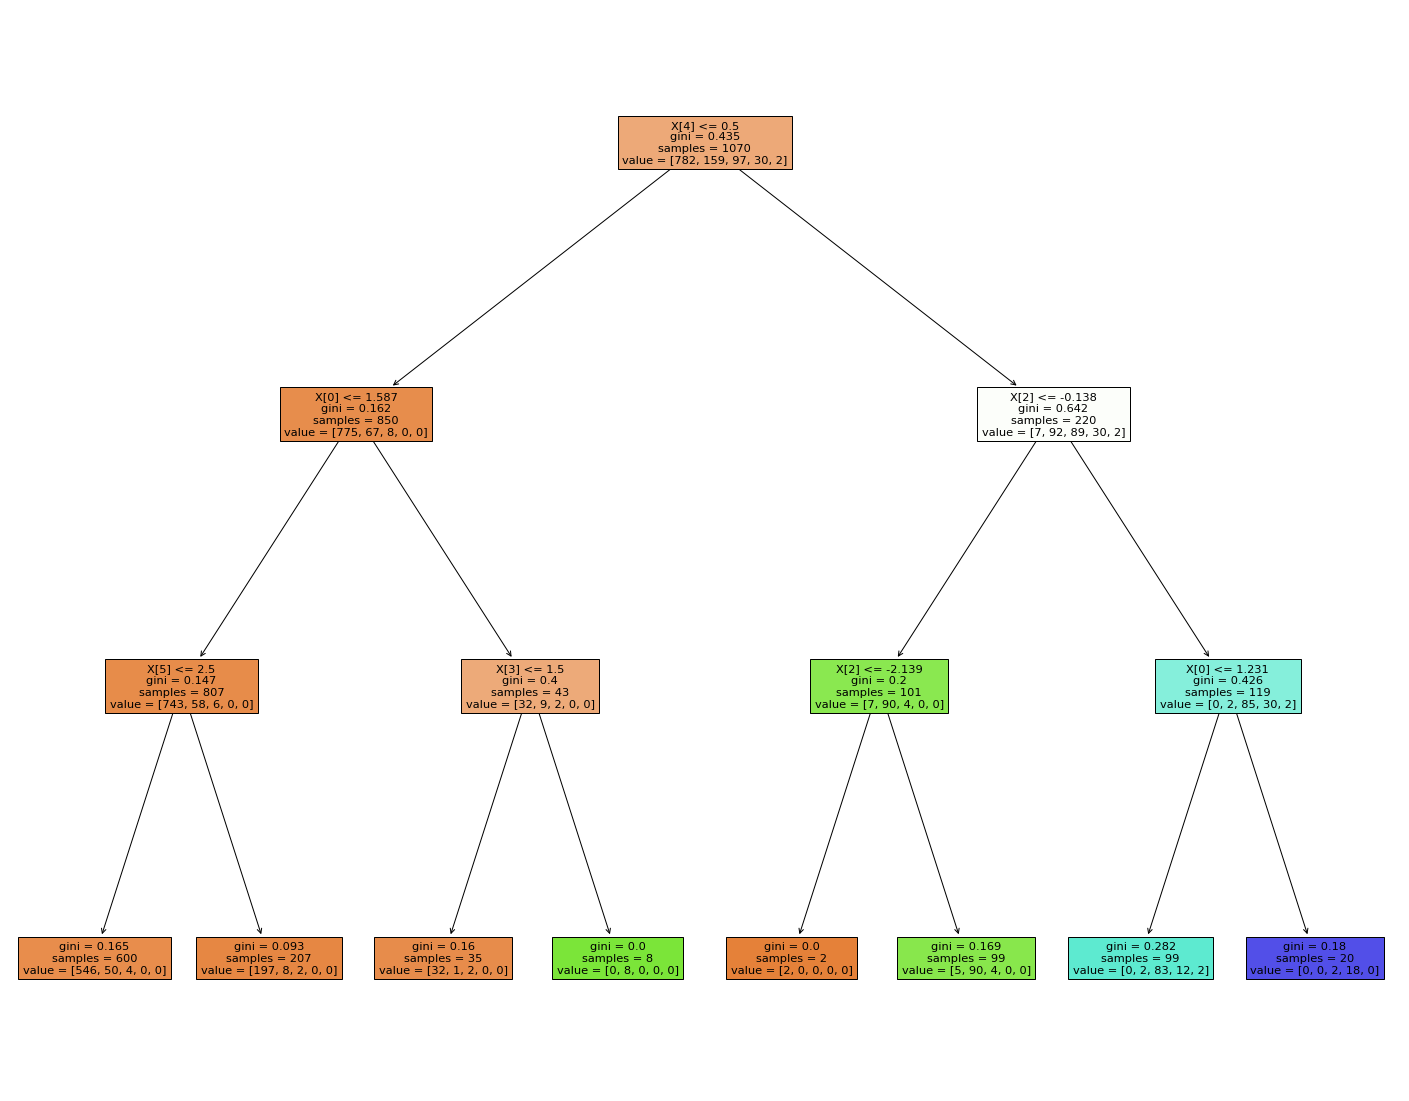

In [52]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decisiontree_clf,filled=True)

In [53]:
predictions = decisiontree_clf.predict(X_test)

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       198
           1       0.88      0.62      0.73        37
           2       0.85      0.81      0.83        27
           3       0.75      0.60      0.67         5
           4       0.00      0.00      0.00         1

    accuracy                           0.91       268
   macro avg       0.68      0.61      0.64       268
weighted avg       0.91      0.91      0.91       268



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##**INFERENCE: DECISION TREE HAS AN ACCURACY OF 91 PERCENT**

##**CONFUSION MATRIX**

In [56]:
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

In [57]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Basic','Average','Affordable','Moderately Expensive','Expensive'])

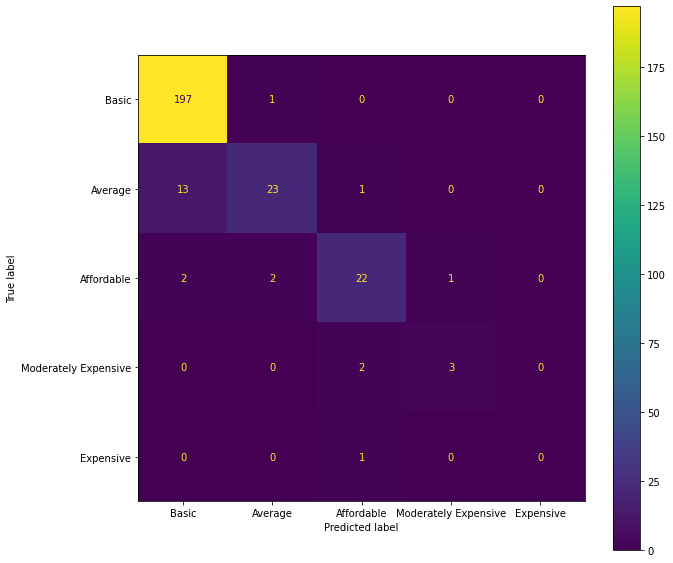

In [64]:

fig, ax = plt.subplots(figsize=(10,10))

cm_display.plot(ax=ax)
plt.show()

#2. SUPPORT VECTOR MACHINE

In [55]:
from sklearn.svm import SVC

In [65]:
svm_clf = SVC(kernel = 'rbf', random_state = 0)
svm_clf.fit(X_train, y_train.ravel())

SVC(random_state=0)

In [66]:
predictions = svm_clf.predict(X_test)

In [67]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       198
           1       0.81      0.57      0.67        37
           2       0.90      0.67      0.77        27
           3       0.71      1.00      0.83         5
           4       0.00      0.00      0.00         1

    accuracy                           0.90       268
   macro avg       0.67      0.65      0.64       268
weighted avg       0.90      0.90      0.89       268



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##**INFERENCE: SVM HAS AN ACCURACY OF 90 PERCENT**

##**CONFUSION MATRIX**

In [68]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)


In [69]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Basic','Average','Affordable','Moderately Expensive','Expensive'])

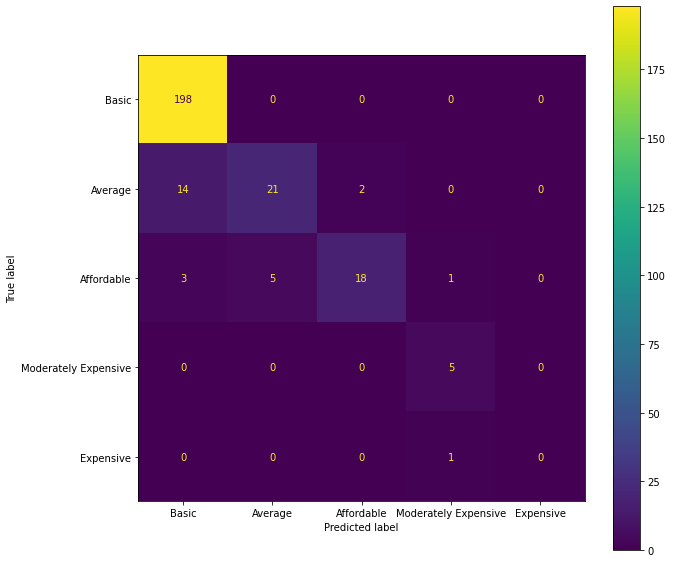

In [70]:
fig, ax = plt.subplots(figsize=(10,10))

cm_display.plot(ax=ax)
plt.show()

#3. NAIVE BAYES

In [71]:
from sklearn.naive_bayes import GaussianNB

In [73]:
gaussian_clf = GaussianNB()
gaussian_clf.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [74]:
predictions = gaussian_clf.predict(X_test)

##**CLASSIFICATION REPORT**

In [76]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       198
           1       0.00      0.00      0.00        37
           2       0.00      0.00      0.00        27
           3       0.13      1.00      0.23         5
           4       0.00      0.00      0.00         1

    accuracy                           0.76       268
   macro avg       0.21      0.40      0.24       268
weighted avg       0.69      0.76      0.71       268



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##**INFERENCE: NAIVE BAYES HAS AN ACCURACY OF 76 PERCENT**

##**CONFUSION MATRIX**

In [77]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

In [78]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Basic','Average','Affordable','Moderately Expensive','Expensive'])

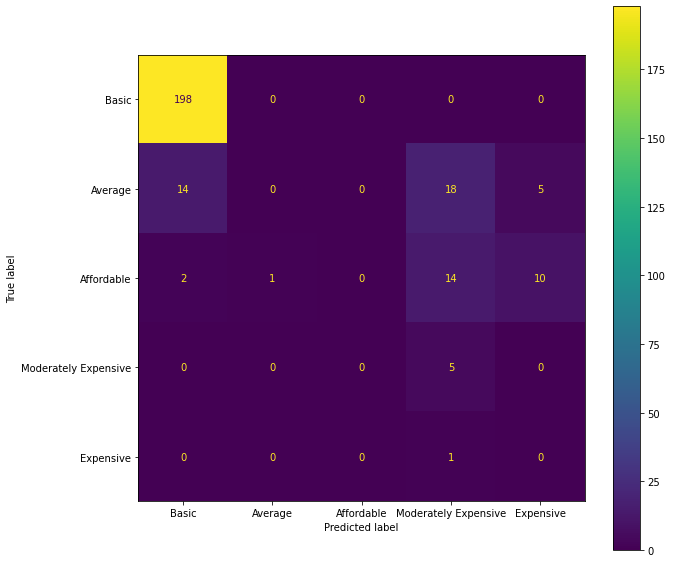

In [79]:
fig, ax = plt.subplots(figsize=(10,10))

cm_display.plot(ax=ax)
plt.show()